# Problema 3

## item a: **SER** 


In [1]:
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # for plotting functions
from matplotlib import cm # colormap for color palette
from scipy.special import erfc

In [2]:
def QAMModem(M): # gray coding into constellation setup ahead
    n=np.arange(0,M) # symbols from 0 to M-1
    a=np.asarray([x^(x>>1) for x in n]) # convert linear to gray code
    D=np.sqrt(M).astype(int) # dimension of our map
    a=np.reshape(a,(D,D)) # slice array on a matrix D x D sized
    oddRows=np.arange(start=1,stop=D,step=2) # identify rows to flip
    a[oddRows,:]=np.fliplr(a[oddRows,:]) # flip the rows
    nGray=np.reshape(a,(M)) # reshape/flatten to 1xM array
    (x,y)=np.divmod(nGray,D) # element-wise quotient and remainder
    Ax=2*x+1-D
    Ay=2*y+1-D
    constellation = Ax + 1j*Ay
    return constellation

def modulate(constellation,inputSymbols):
    modulatedVec = constellation[inputSymbols]
    return modulatedVec 

def demodulate(constellation,receivedSyms):
    # received vector and reference in cartesian form
    from scipy.spatial.distance import cdist
    XA = np.column_stack((np.real(receivedSyms),np.imag(receivedSyms)))
    XB = np.column_stack((np.real(constellation),np.imag(constellation)))
        
    d = cdist(XA,XB,metric='euclidean') #compute pair-wise Euclidean distances
    detectedSyms=np.argmin(d,axis=1)#indices corresponding minimum Euclid. dist.
    return detectedSyms

def awgn(s, SNRdB):
    gamma = 10**(SNRdB/10) #SNR to linear scale
    P=np.sum(abs(s)**2)/len(s) # power in the vector -> P=sum (X^{2})/M
    N0=P/gamma # noise spectral density
    n = np.sqrt(N0/2)*(np.random.randn(len(s)) + 1j*np.random.randn(len(s))) # AWGN with unity power
    r = s + n # received signal + noise
    return r

def qam_awgn(M,gamma_s):
    if (M==1) or (np.mod(np.log2(M),2)!=0): # M not a even power of 2
        raise ValueError('Only square MQAM supported. M must be even power of 2')
    SERs = 1-(1-(1-1/np.sqrt(M))*erfc(np.sqrt(3/2*gamma_s/(M-1))))**2
    return SERs

(1e-06, np.float64(1.641422625943053))

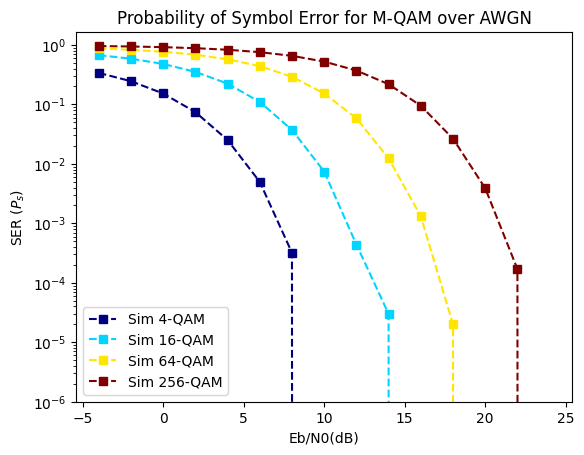

In [3]:
#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit # also, compile time for 10**6 is over 30s. for a quicker result do either 10**5 or 10**4
EbN0dBs = np.arange(start=-4,stop = 26, step = 2) # Eb/N0 range in dB for simulation
mod_type = 'QAM'
arrayOfM=[4,16,64,256] 

colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

for i, M in enumerate(arrayOfM):
    #-----Initialization of various parameters----
    k=np.log2(M)
    EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
    SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
    inputSyms = np.random.randint(low=0, high = M, size=nSym) # uniform random symbols from 0 to M-1
    
    constellation = QAMModem(M)
    modulatedSyms = modulate(constellation,inputSyms) #modulate

    for j,EsN0dB in enumerate(EsN0dBs):
        receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
        detectedSyms = demodulate(constellation,receivedSyms)
        
        SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
    
    
    ax.semilogy(EbN0dBs,SER_sim,color = colors[i],marker='s',linestyle='--',label='Sim '+str(M)+'-'+mod_type.upper())
    # in case you want to see the theoretical values plotted as well, uncomment the following lines:
    #gamma_s = np.log2(M)*(10**(EbN0dBs/10))
    #SER_theory = qam_awgn(M,gamma_s) #theory SER
    #ax.semilogy(EbN0dBs,SER_theory,color = colors[i],linestyle='-',label='Theory, '+str(M)+'-'+mod_type.upper())


ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-'+str(mod_type)+' over AWGN')
ax.legend()
ax.set_ylim(1e-6) # if you don't set the limit it will get goofy. leave this untouched.

## item b: **BER**

$$\frac{P_{e}}{\log_{2}M}\leq P_{b} \leq P_{e}$$
$$\implies P_{b}\approx=\frac{P_{e}}{\log_{2}M}$$

O código é basicamente a mesma coisa, só que mudando o código *um pouquinho* pra ser $\frac{\text{SER}}{\log_{2}M}$ no lugar de $\text{SER}$.

(1e-06, np.float64(0.3057256208756137))

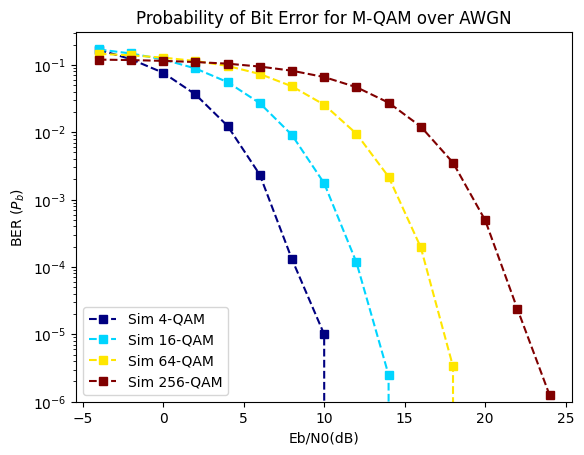

In [4]:
#---------Input Fields------------------------
nSym = 10**5 # Number of symbols to transmit # also, compile time for 10**6 is over 30s. for a quicker result do either 10**5 or 10**4
EbN0dBs = np.arange(start=-4,stop = 26, step = 2) # Eb/N0 range in dB for simulation
mod_type = 'QAM'
arrayOfM=[4,16,64,256] 

colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

for i, M in enumerate(arrayOfM):
    #-----Initialization of various parameters----
    k=np.log2(M)
    EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
    SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
    inputSyms = np.random.randint(low=0, high = M, size=nSym) # uniform random symbols from 0 to M-1
    
    constellation = QAMModem(M)
    modulatedSyms = modulate(constellation,inputSyms) #modulate

    for j,EsN0dB in enumerate(EsN0dBs):
        receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
        detectedSyms = demodulate(constellation,receivedSyms)
        
        SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
    
    
    ax.semilogy(EbN0dBs,SER_sim/k,color = colors[i],marker='s',linestyle='--',label='Sim '+str(M)+'-'+mod_type.upper())
    # in case you want to see the theoretical values plotted as well, uncomment the following lines:
    #gamma_s = np.log2(M)*(10**(EbN0dBs/10))
    #SER_theory = qam_awgn(M,gamma_s) #theory SER
    #ax.semilogy(EbN0dBs,SER_theory/k,color = colors[i],linestyle='-',label='Theory, '+str(M)+'-'+mod_type.upper())


ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for M-'+str(mod_type)+' over AWGN')
ax.legend()
ax.set_ylim(1e-6) # if you don't set the limit it will get goofy. leave this untouched.